In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 9:1
df = pd.read_csv('../../Dataset/ACB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,11361.0
1,3/4/2019,11512.4
2,3/5/2019,11474.6
3,3/6/2019,11474.6
4,3/7/2019,11550.3
...,...,...
1303,5/27/2024,29450.0
1304,5/28/2024,29650.0
1305,5/29/2024,29250.0
1306,5/30/2024,25565.2


In [4]:
data

,Price
0,11361.0
1,11512.4
2,11474.6
3,11474.6
4,11550.3
...,...
1303,29450.0
1304,29650.0
1305,29250.0
1306,25565.2


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 5.561264847732858
Mean Absolute Error (MAE): 1449.3335124078806
Root Mean Squared Error (RMSE): 1797.156716196285


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[27011.50587312]
 [27023.35271602]
 [27035.19955892]
 [27047.04640182]
 [27058.89324472]
 [27070.74008762]
 [27082.58693052]
 [27094.43377342]
 [27106.28061632]
 [27118.12745922]
 [27129.97430212]
 [27141.82114502]
 [27153.66798792]
 [27165.51483082]
 [27177.36167372]
 [27189.20851662]
 [27201.05535952]
 [27212.90220241]
 [27224.74904531]
 [27236.59588821]
 [27248.44273111]
 [27260.28957401]
 [27272.13641691]
 [27283.98325981]
 [27295.83010271]
 [27307.67694561]
 [27319.52378851]
 [27331.37063141]
 [27343.21747431]
 [27355.06431721]]
RangeIndex(start=1307, stop=1337, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[27023.35271602]
 [27035.19955892]
 [27047.04640182]
 [27058.89324472]
 [27070.74008762]
 [27082.58693052]
 [27094.43377342]
 [27106.28061632]
 [27118.12745922]
 [27129.97430212]
 [27141.82114502]
 [27153.66798792]
 [27165.51483082]
 [27177.36167372]
 [27189.20851662]
 [27201.05535952]
 [27212.90220241]
 [27224.74904531]
 [27236.59588821]
 [27248.44273111]
 [27260.28957401]
 [27272.13641691]
 [27283.98325981]
 [27295.83010271]
 [27307.67694561]
 [27319.52378851]
 [27331.37063141]
 [27343.21747431]
 [27355.06431721]
 [27366.91116011]
 [27378.75800301]
 [27390.60484591]
 [27402.45168881]
 [27414.29853171]
 [27426.14537461]
 [27437.99221751]
 [27449.8390604 ]
 [27461.6859033 ]
 [27473.5327462 ]
 [27485.3795891 ]
 [27497.226432  ]
 [27509.0732749 ]
 [27520.9201178 ]
 [27532.7669607 ]
 [27544.6138036 ]
 [27556.4606465 ]
 [27568.3074894 ]
 [27580.1543323 ]
 [27592.0011752 ]
 [27603.8480181 ]
 [27615.694861  ]
 [27627.5417039 ]
 [27639.3885468 ]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[27011.50587312]
 [27023.35271602]
 [27035.19955892]
 [27047.04640182]
 [27058.89324472]
 [27070.74008762]
 [27082.58693052]
 [27094.43377342]
 [27106.28061632]
 [27118.12745922]
 [27129.97430212]
 [27141.82114502]
 [27153.66798792]
 [27165.51483082]
 [27177.36167372]
 [27189.20851662]
 [27201.05535952]
 [27212.90220241]
 [27224.74904531]
 [27236.59588821]
 [27248.44273111]
 [27260.28957401]
 [27272.13641691]
 [27283.98325981]
 [27295.83010271]
 [27307.67694561]
 [27319.52378851]
 [27331.37063141]
 [27343.21747431]
 [27355.06431721]
 [27366.91116011]
 [27378.75800301]
 [27390.60484591]
 [27402.45168881]
 [27414.29853171]
 [27426.14537461]
 [27437.99221751]
 [27449.8390604 ]
 [27461.6859033 ]
 [27473.5327462 ]
 [27485.3795891 ]
 [27497.226432  ]
 [27509.0732749 ]
 [27520.9201178 ]
 [27532.7669607 ]
 [27544.6138036 ]
 [27556.4606465 ]
 [27568.3074894 ]
 [27580.1543323 ]
 [27592.0011752 ]
 [27603.8480181 ]
 [27615.694861  ]
 [27627.5417039 ]

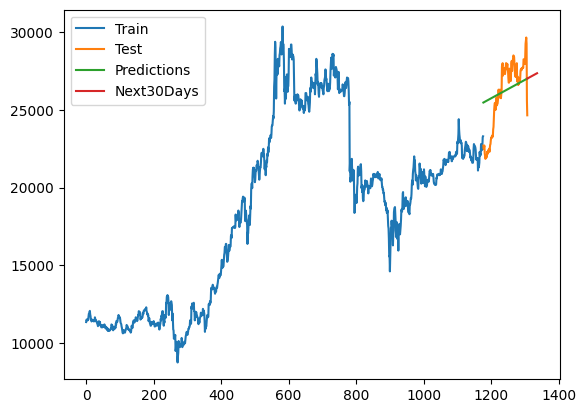

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

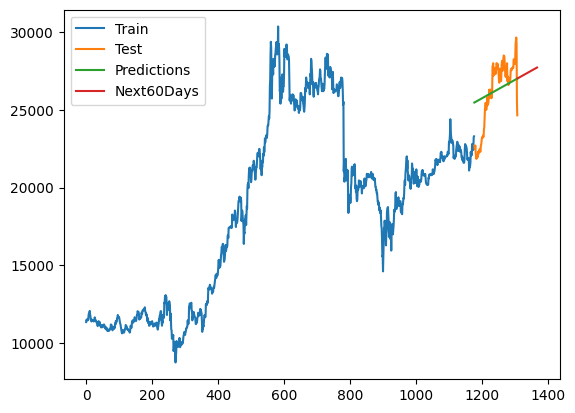

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

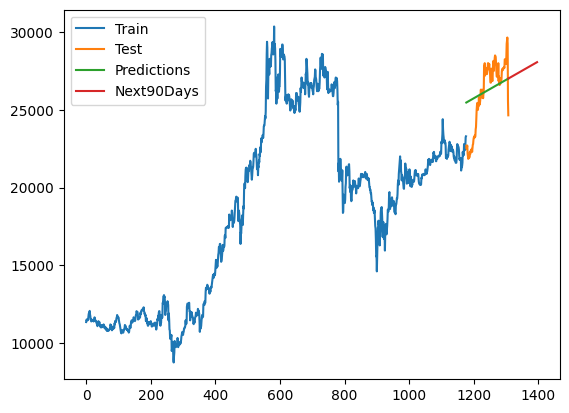

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()